In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('Income-Expenditure Dataset/Inc_Exp_Data.csv')

df['income_ex_ratio'] = df['Emi_or_Rent_Amt'] / df['Mthly_HH_Income']


# Filter out entries with zero rent/mortgage (logical outliers)
df_filtered = df[df['Emi_or_Rent_Amt'] > 0].copy()

(-1000.0, 35000.0)

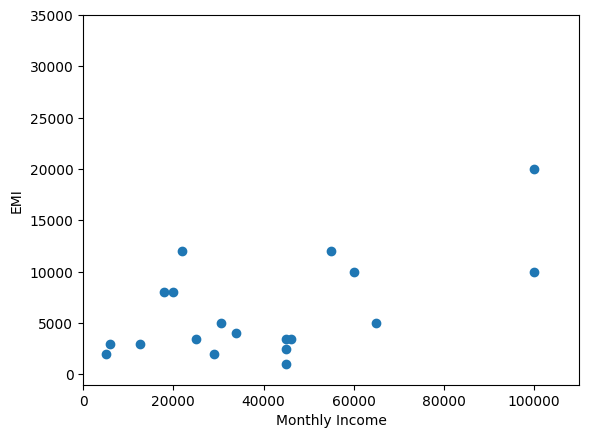

In [4]:
# Remove statistical outliers using IQR method on Income and EMI/Rent
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.20)
    Q3 = df[column].quantile(0.80)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


df_filtered = remove_outliers_iqr(df_filtered, 'income_ex_ratio')

plt.scatter(df_filtered['Mthly_HH_Income'], df_filtered['Emi_or_Rent_Amt'])
plt.xlabel('Monthly Income')
plt.ylabel('EMI')
plt.xlim((0,110000))
plt.ylim((-1000,35000))

In [31]:
# Fit linear regression on filtered data
X = df_filtered[['Mthly_HH_Income']]
y = df_filtered['Emi_or_Rent_Amt']
model = LinearRegression().fit(X, y)

# Generate 100 synthetic samples within the observed income range
np.random.seed(42)
new_incomes = np.random.uniform(
    low=df_filtered['Mthly_HH_Income'].min(),
    high=df_filtered['Mthly_HH_Income'].max(),
    size=100
)

# Predict expenditures and add small Gaussian noise (5% of the learned slope)
noise_scale = abs(model.coef_[0]) * 25000.5
new_expenditures = model.predict(new_incomes.reshape(-1, 1)) + np.random.normal(scale=noise_scale, size=100)

# Build synthetic DataFrame
new_df = pd.DataFrame({
    'Mthly_HH_Income': new_incomes,
    'Emi_or_Rent_Amt': new_expenditures
})

# Combine original (filtered) and synthetic data
augmented_df = pd.concat([df_filtered[['Mthly_HH_Income', 'Emi_or_Rent_Amt']], new_df], ignore_index=True)

# Save for further use
augmented_df.to_csv('Income-Expenditure Dataset/Inc_Exp_Data_augmented.csv', index=False)


/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(-1000.0, 35000.0)

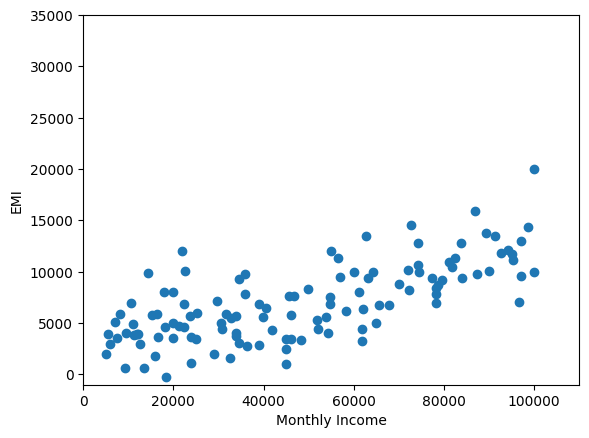

In [32]:
plt.scatter(augmented_df['Mthly_HH_Income'], augmented_df['Emi_or_Rent_Amt'])
plt.xlabel('Monthly Income')
plt.ylabel('EMI')
plt.xlim((0,110000))
plt.ylim((-1000,35000))